# RIVM aantal besmettingen per gemeente



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import cufflinks as cf
from IPython.display import display,HTML

cf.set_config_file(sharing='public',theme='ggplot',offline=True)

df = pd.read_json("https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.json")
df

,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Hospital_admission,Deceased
0,2021-11-26 10:00:00,2020-02-28,GM0014,Groningen,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
1,2021-11-26 10:00:00,2020-02-28,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0
2,2021-11-26 10:00:00,2020-02-28,GM0037,Stadskanaal,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
3,2021-11-26 10:00:00,2020-02-28,GM0047,Veendam,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
4,2021-11-26 10:00:00,2020-02-28,GM0050,Zeewolde,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
241159,2021-11-26 10:00:00,2021-11-26,None,None,Limburg,VR23,Limburg-Noord,GGD Limburg-Noord,Netwerk Acute Zorg Limburg,3,0,0
241160,2021-11-26 10:00:00,2021-11-26,None,None,Limburg,VR24,Limburg-Zuid,GGD Zuid-Limburg,Netwerk Acute Zorg Limburg,23,0,0
241161,2021-11-26 10:00:00,2021-11-26,None,None,Zuid-Holland,VR15,Haaglanden,GGD Haaglanden,Netwerk Acute Zorg West,11,0,0
241162,2021-11-26 10:00:00,2021-11-26,None,None,Fryslân,VR02,Fryslân,GGD Fryslân,Acute Zorgnetwerk Noord Nederland,9,0,0


In [2]:
df.head()

,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Hospital_admission,Deceased
0,2021-11-26 10:00:00,2020-02-28,GM0014,Groningen,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
1,2021-11-26 10:00:00,2020-02-28,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0
2,2021-11-26 10:00:00,2020-02-28,GM0037,Stadskanaal,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
3,2021-11-26 10:00:00,2020-02-28,GM0047,Veendam,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
4,2021-11-26 10:00:00,2020-02-28,GM0050,Zeewolde,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241164 entries, 0 to 241163
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Date_of_report            241164 non-null  object
 1   Date_of_publication       241164 non-null  object
 2   Municipality_code         225214 non-null  object
 3   Municipality_name         225214 non-null  object
 4   Province                  241164 non-null  object
 5   Security_region_code      240526 non-null  object
 6   Security_region_name      240526 non-null  object
 7   Municipal_health_service  241164 non-null  object
 8   ROAZ_region               237336 non-null  object
 9   Total_reported            241164 non-null  int64 
 10  Hospital_admission        241164 non-null  int64 
 11  Deceased                  241164 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 22.1+ MB


In [4]:
df.describe()

,Total_reported,Hospital_admission,Deceased
count,241164.000000,241164.000000,241164.000000
mean,10.596171,0.146137,0.079684
std,25.850050,0.666110,0.422483
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,11.000000,0.000000,0.000000
max,971.000000,52.000000,28.000000


In [5]:
df.groupby(["Municipality_name"]).sum().nlargest(10, "Total_reported")

,Total_reported,Hospital_admission,Deceased
Municipality_name,,,
Amsterdam,139152,2289,896
Rotterdam,115428,2218,1009
's-Gravenhage,79618,1996,589
Utrecht,52412,818,267
Tilburg,35645,461,284
Eindhoven,33293,492,369
Almere,30536,402,114
Breda,27055,289,163
Groningen,25002,123,54


In [6]:
df.groupby(["Municipality_name"]).sum().nlargest(10, "Deceased")

,Total_reported,Hospital_admission,Deceased
Municipality_name,,,
Rotterdam,115428,2218,1009
Amsterdam,139152,2289,896
's-Gravenhage,79618,1996,589
Eindhoven,33293,492,369
Tilburg,35645,461,284
Utrecht,52412,818,267
Maastricht,17384,395,226
Nijmegen,24606,324,212
Dordrecht,20281,287,196


In [7]:
df.groupby(["Municipality_name"]).sum().nsmallest(10, "Total_reported")

,Total_reported,Hospital_admission,Deceased
Municipality_name,,,
Schiermonnikoog,53,1,2
Vlieland,111,1,0
Rozendaal,168,1,0
Ameland,314,3,1
Terschelling,490,3,2
Noord-Beveland,816,23,10
Baarle-Nassau,895,14,4
Mook en Middelaar,925,13,13
Texel,986,6,4


In [8]:
df.groupby(["Municipality_name"]).sum().nsmallest(10, "Deceased")

,Total_reported,Hospital_admission,Deceased
Municipality_name,,,
Rozendaal,168,1,0
Vlieland,111,1,0
Ameland,314,3,1
Zoeterwoude,1276,11,1
Schiermonnikoog,53,1,2
Terschelling,490,3,2
Beemster,1390,9,3
Baarle-Nassau,895,14,4
Texel,986,6,4


In [9]:
df.groupby(["Security_region_name"]).sum().nlargest(10, "Total_reported")

,Total_reported,Hospital_admission,Deceased
Security_region_name,,,
Rotterdam-Rijnmond,225442,3958,2013
Utrecht,199877,2981,1349
Midden- en West-Brabant,169487,2031,1203
Amsterdam-Amstelland,169235,2621,1086
Haaglanden,163946,3025,1094
Hollands-Midden,125451,1626,829
Brabant-Zuidoost,118645,1773,1045
Noord- en Oost-Gelderland,109439,1309,873
Brabant-Noord,104511,1634,1046


In [10]:
df["Total_reported"].sum()

2555415

In [11]:
df.groupby(["Date_of_publication"]).sum()

,Total_reported,Hospital_admission,Deceased
Date_of_publication,,,
2020-02-28,1,1,0
2020-02-29,1,0,0
2020-03-01,3,1,0
2020-03-02,5,0,0
2020-03-03,4,1,0
...,...,...,...
2021-11-22,23027,61,29
2021-11-23,22987,79,53
2021-11-24,23750,84,50


In [12]:
df.groupby(["Date_of_publication"]).sum().iplot()

In [13]:
dftr = df.groupby(["Date_of_publication"])["Total_reported"].sum()
dftr.iplot()

In [14]:
dfha = df.groupby(["Date_of_publication"])["Hospital_admission"].sum()
dfha.iplot()

In [15]:
dfd = df.groupby(["Date_of_publication"])["Deceased"].sum()
dfd.iplot()

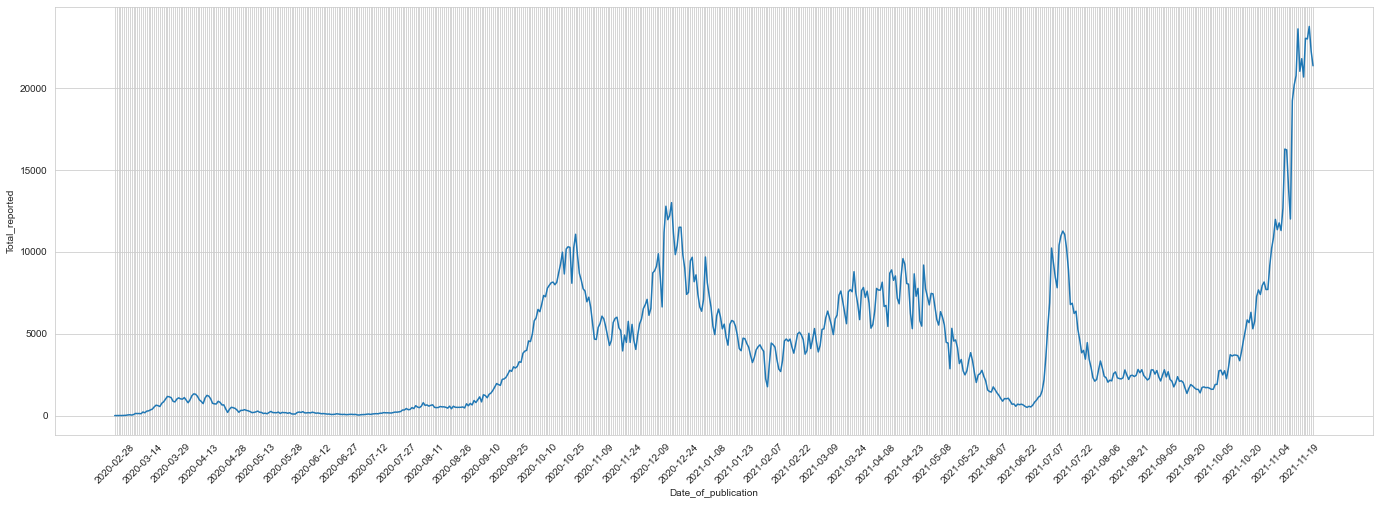

In [16]:
def lesslabels():
    for ind, label in enumerate(fig.get_xticklabels()):
        if ind % 15 == 0:  # every 15th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)


def cm2inch(value):
    return value/2.54

plt.figure(figsize=(cm2inch(60), cm2inch(20)))
fig = sns.lineplot(data=dftr)
# plt.axhline(y=1.0, color='r', linestyle='-')
lesslabels()
plt.xticks(rotation=45)
plt.show()

<Figure size 1700.79x566.929 with 0 Axes>

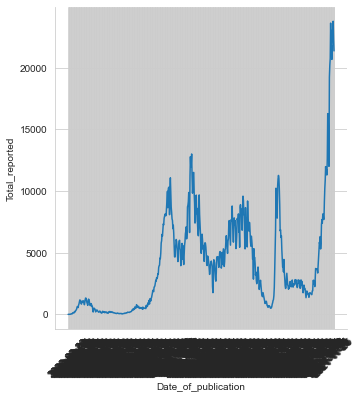

In [17]:
plt.figure(figsize=(cm2inch(60), cm2inch(20)))
fig = sns.relplot(data=dftr, kind = "line")
# plt.axhline(y=1.0, color='r', linestyle='-')
# lesslabels()
plt.xticks(rotation=45)
plt.show()